In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
# Read the data
df = pd.read_csv('time_frequency.csv')
df

,Project,ReleaseTimestamp
0,com.google.apis:google-api-services-adsense,1364845709000
1,com.google.apis:google-api-services-adsense,1364845760000
2,com.google.apis:google-api-services-adsense,1364845796000
3,com.google.apis:google-api-services-adsense,1364845849000
4,com.google.apis:google-api-services-adsense,1364845886000
...,...,...
33094,org.wso2.identity.apps:myaccount,1724602179000
33095,org.wso2.identity.apps:myaccount,1724663429000
33096,org.wso2.identity.apps:myaccount,1724667268000
33097,org.wso2.identity.apps:myaccount,1724680442000


In [4]:
# Strip column names and ensure timestamps are converted
print(df.columns.str.strip())
df['ReleaseDate'] = pd.to_datetime(df['ReleaseTimestamp'], unit='ms')
df

Index(['Project', 'ReleaseTimestamp'], dtype='object')


,Project,ReleaseTimestamp,ReleaseDate
0,com.google.apis:google-api-services-adsense,1364845709000,2013-04-01 19:48:29
1,com.google.apis:google-api-services-adsense,1364845760000,2013-04-01 19:49:20
2,com.google.apis:google-api-services-adsense,1364845796000,2013-04-01 19:49:56
3,com.google.apis:google-api-services-adsense,1364845849000,2013-04-01 19:50:49
4,com.google.apis:google-api-services-adsense,1364845886000,2013-04-01 19:51:26
...,...,...,...
33094,org.wso2.identity.apps:myaccount,1724602179000,2024-08-25 16:09:39
33095,org.wso2.identity.apps:myaccount,1724663429000,2024-08-26 09:10:29
33096,org.wso2.identity.apps:myaccount,1724667268000,2024-08-26 10:14:28
33097,org.wso2.identity.apps:myaccount,1724680442000,2024-08-26 13:54:02


In [7]:
df = df.sort_values(by=['Project', 'ReleaseDate'])
df

,Project,ReleaseTimestamp,ReleaseDate
0,com.google.apis:google-api-services-adsense,1364845709000,2013-04-01 19:48:29
1,com.google.apis:google-api-services-adsense,1364845760000,2013-04-01 19:49:20
2,com.google.apis:google-api-services-adsense,1364845796000,2013-04-01 19:49:56
3,com.google.apis:google-api-services-adsense,1364845849000,2013-04-01 19:50:49
4,com.google.apis:google-api-services-adsense,1364845886000,2013-04-01 19:51:26
...,...,...,...
33094,org.wso2.identity.apps:myaccount,1724602179000,2024-08-25 16:09:39
33095,org.wso2.identity.apps:myaccount,1724663429000,2024-08-26 09:10:29
33096,org.wso2.identity.apps:myaccount,1724667268000,2024-08-26 10:14:28
33097,org.wso2.identity.apps:myaccount,1724680442000,2024-08-26 13:54:02


In [9]:
df['TimeBetweenUpdates'] = df.groupby('Project')['ReleaseDate'].diff().dt.days
df

,Project,ReleaseTimestamp,ReleaseDate,TimeBetweenUpdates
0,com.google.apis:google-api-services-adsense,1364845709000,2013-04-01 19:48:29,NaN
1,com.google.apis:google-api-services-adsense,1364845760000,2013-04-01 19:49:20,0.0
2,com.google.apis:google-api-services-adsense,1364845796000,2013-04-01 19:49:56,0.0
3,com.google.apis:google-api-services-adsense,1364845849000,2013-04-01 19:50:49,0.0
4,com.google.apis:google-api-services-adsense,1364845886000,2013-04-01 19:51:26,0.0
...,...,...,...,...
33094,org.wso2.identity.apps:myaccount,1724602179000,2024-08-25 16:09:39,41.0
33095,org.wso2.identity.apps:myaccount,1724663429000,2024-08-26 09:10:29,0.0
33096,org.wso2.identity.apps:myaccount,1724667268000,2024-08-26 10:14:28,0.0
33097,org.wso2.identity.apps:myaccount,1724680442000,2024-08-26 13:54:02,0.0


In [10]:
# Group statistics by project
project_stats = df.groupby('Project')['TimeBetweenUpdates'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
project_stats

,Project,mean,median,std,min,max
0,com.google.apis:google-api-services-adsense,0.792583,0.0,5.822263,0.0,142.0
1,com.google.apis:google-api-services-genomics,0.884067,0.0,7.496378,0.0,251.0
2,com.google.apis:google-api-services-youtubeAna...,1.060671,0.0,11.515810,0.0,401.0
3,org.wso2.carbon.apimgt:apimgt,0.880728,0.0,7.337173,0.0,259.0
4,org.wso2.carbon.apimgt:apimgt-feature,0.881322,0.0,7.338692,0.0,259.0
5,org.wso2.carbon.apimgt:carbon-apimgt,0.880391,0.0,7.337190,0.0,259.0
6,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,0.881659,0.0,7.339731,0.0,259.0
7,org.wso2.carbon.apimgt:org.wso2.carbon.apimgt....,0.881322,0.0,7.338692,0.0,259.0
8,org.wso2.identity.apps:console,0.253806,0.0,3.940317,0.0,147.0
9,org.wso2.identity.apps:myaccount,0.255397,0.0,5.004886,0.0,259.0


[]

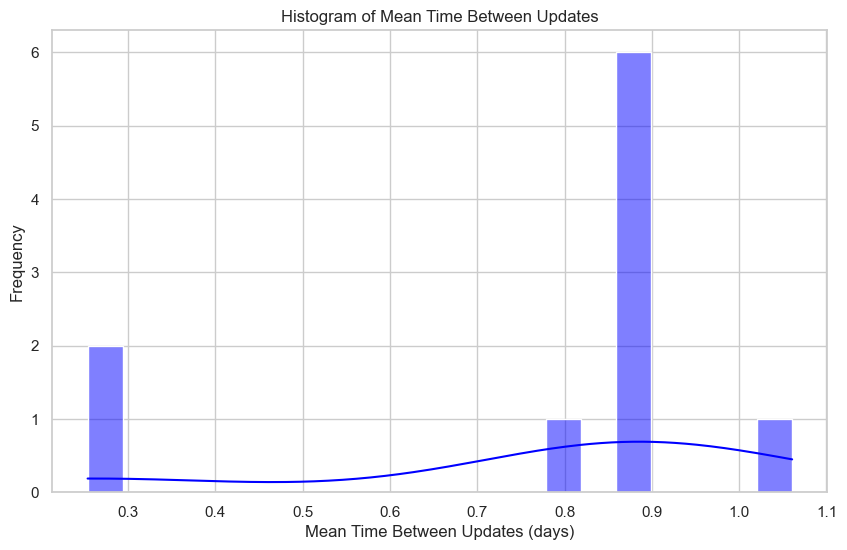

In [12]:
# Visualizations
sns.set(style="whitegrid")  # Set a nice style for the plots

# 1. Histogram of mean time between updates
plt.figure(figsize=(10, 6))
sns.histplot(project_stats['mean'], bins=20, kde=True, color='blue')
plt.title('Histogram of Mean Time Between Updates')
plt.xlabel('Mean Time Between Updates (days)')
plt.ylabel('Frequency')
plt.savefig('histogram_mean_time_between_updates.png')
plt.plot()

[]

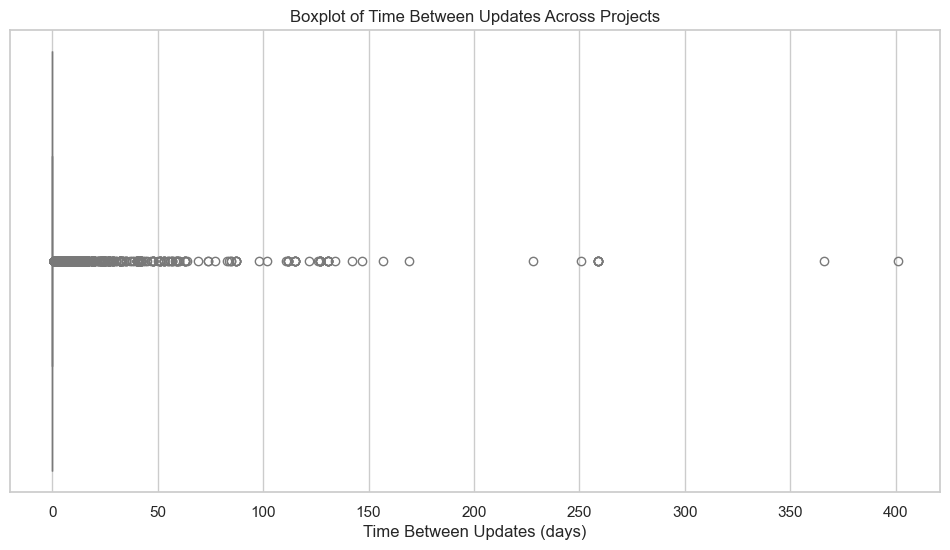

In [13]:
# 2. Boxplot for TimeBetweenUpdates
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TimeBetweenUpdates', color='lightblue')
plt.title('Boxplot of Time Between Updates Across Projects')
plt.xlabel('Time Between Updates (days)')
plt.savefig('boxplot_time_between_updates.png')
plt.plot()

[]

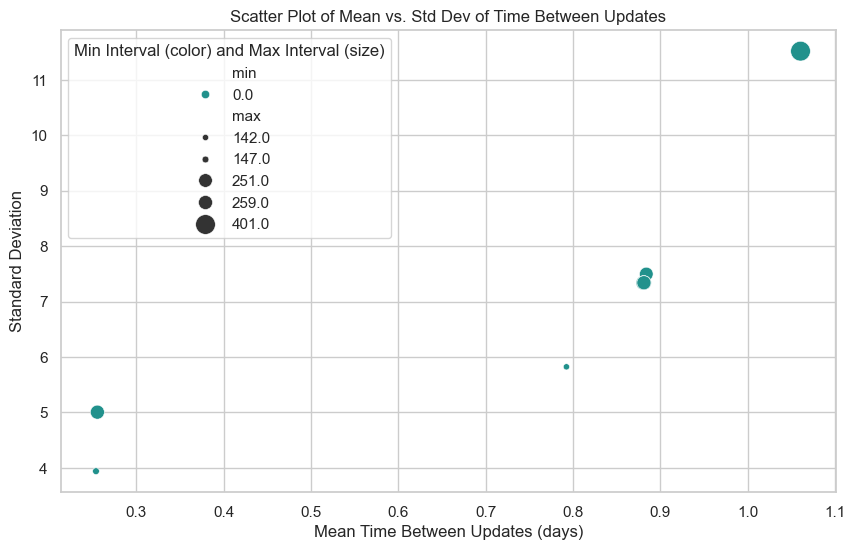

In [15]:
# 3. Scatter plot (Mean vs Std)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=project_stats, x='mean', y='std', hue='min', palette='viridis', size='max', sizes=(20, 200))
plt.title('Scatter Plot of Mean vs. Std Dev of Time Between Updates')
plt.xlabel('Mean Time Between Updates (days)')
plt.ylabel('Standard Deviation')
plt.legend(title='Min Interval (color) and Max Interval (size)')
plt.savefig('scatterplot_mean_vs_std.png')
plt.plot()